<a href="https://colab.research.google.com/github/Ravi815351/Some-project/blob/master/Airline_Passenger_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving airline_passengers.csv to airline_passengers.csv


In [ ]:
airline=pd.read_csv('airline_passengers.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
airline#as you can see the date is in month and year formate its means the data is interval of months

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
#the data is in time series analyies here we will do the time series  analiyes and fafter that we forcast the data future data
#before that first chanfge the date column into proper date formate
airline1=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

airline1

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
# as above we can see the months wala data is now as index  which will make easy to plot a grap and find the trends
#it is necessary that the index column should be time = which is here months column
airline1.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


<Axes: >

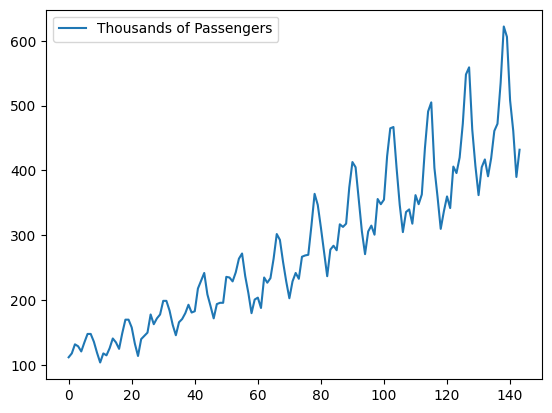

In [ ]:
airline.plot()# as there is only one colomn left there graph has been ploted but the xaxis here is not respect to time

<Axes: xlabel='Month'>

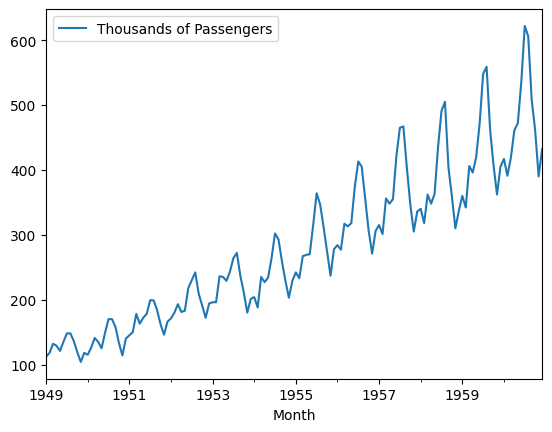

In [ ]:
airline1.plot()# here the x axis is respect to time

In [ ]:
#seasonal_decompose libeary will help to find the different type of trends
# there is two approch followed  in this libaryies add and multiplicative
from statsmodels.tsa.seasonal import seasonal_decompose

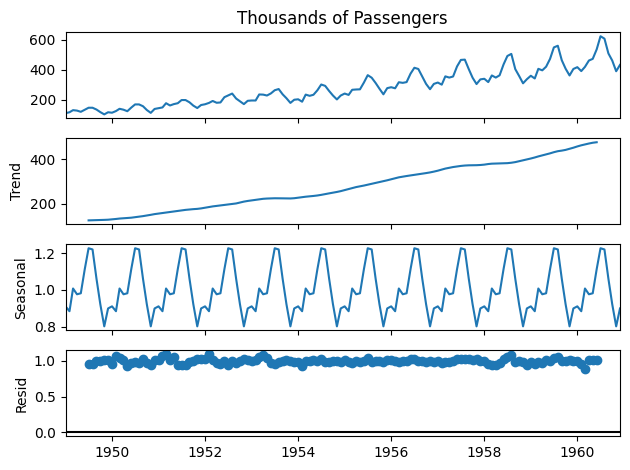

In [ ]:
result=seasonal_decompose(airline1['Thousands of Passengers'],model='multiplicative')
result.plot();# here the graph show if the treand will multiplicative then how its will look

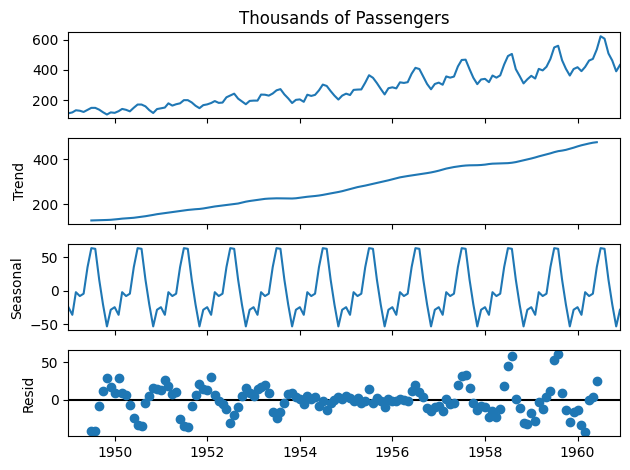

In [ ]:
result1=seasonal_decompose(airline1['Thousands of Passengers'],model='add')
result1.plot();# this is as addtive nature

<Axes: xlabel='Month'>

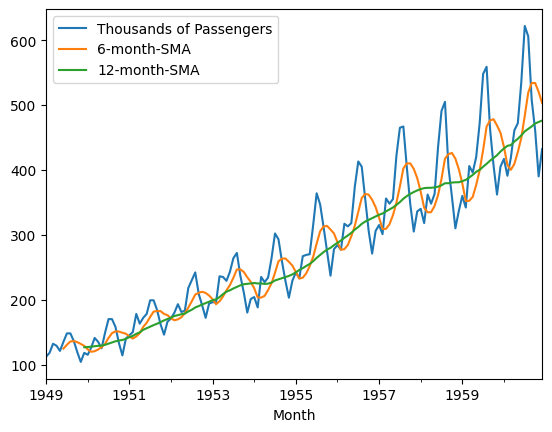

In [ ]:
airline1['6-month-SMA']=airline1['Thousands of Passengers'].rolling(window=6).mean()
airline1['12-month-SMA']=airline1['Thousands of Passengers'].rolling(window=12).mean()
airline1.plot()#here SMA denote the average value of n months

<Axes: xlabel='Month'>

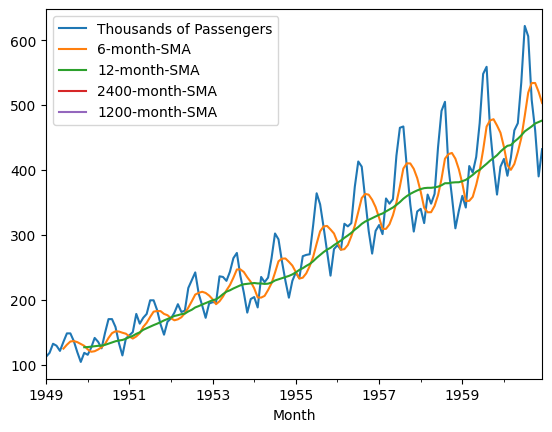

In [ ]:
airline1['2400-month-SMA']=airline1['Thousands of Passengers'].rolling(window=2400).mean()
airline1['1200-month-SMA']=airline1['Thousands of Passengers'].rolling(window=1200).mean()
airline1.plot()

<Axes: >

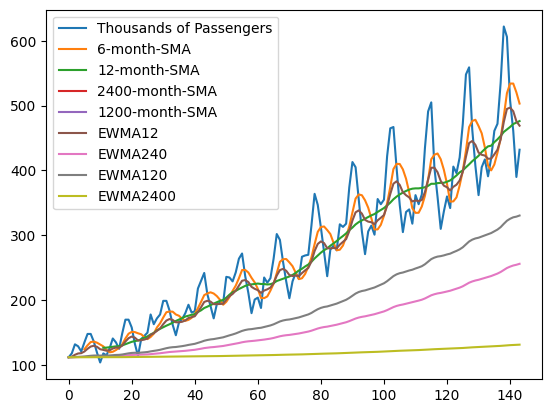

In [ ]:
airline['EWMA12']=airline['Thousands of Passengers'].ewm(span=12, adjust=False).mean()
airline['EWMA240']=airline['Thousands of Passengers'].ewm(span=240,adjust=False).mean()
airline['EWMA120']=airline['Thousands of Passengers'].ewm(span=120, adjust=False).mean()
airline['EWMA2400']=airline['Thousands of Passengers'].ewm(span=2400,adjust=False).mean()
airline.plot() # here EWMA denotes the average values of every n weeks

<Axes: >

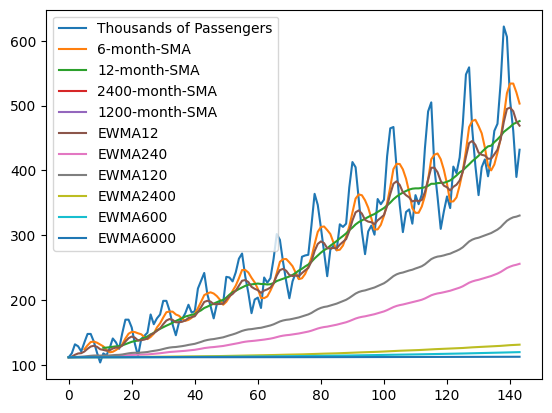

In [ ]:
airline['EWMA6000']=airline['Thousands of Passengers'].ewm(span=60000,adjust=False).mean()
airline.plot()# from above what ever we perform all give the information how was the trend not future forcasting

In [ ]:
# now with the help of the trend we will also forcast the future values without having the future data we will just for cast the future data

from google.colab import files
uploaded=files.upload()

Saving BeerWineLiquor.csv to BeerWineLiquor.csv


In [ ]:
# there is two column one is for time and other for data
beer=pd.read_csv('BeerWineLiquor.csv')
beer

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


In [ ]:
#first make the time column as proper formate and also as index
beer1=pd.read_csv('BeerWineLiquor.csv',index_col='date',parse_dates=True)
beer1

,beer
date,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822
...,...
2018-08-01,4898
2018-09-01,4598
2018-10-01,4737


In [ ]:
!pip install pmdarima  #this libaries help in forcasting the values or predcting the values

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.3 MB/s eta 0:00:00


<Axes: xlabel='date'>

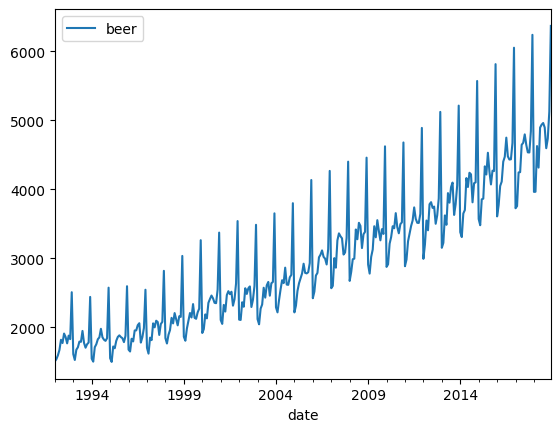

In [ ]:
beer1.plot()#lets look how trend is there as given data

In [ ]:
df=pd.read_csv('BeerWineLiquor.csv')# with respect to time
df

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


In [ ]:
# for for casting the values
#we will use PROPHET libaries
#where the colomn should be ds=[time column]  ,y=[dtaa column]  so rename it in which we went to forcast the values
df.columns=['ds','y']
df

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130


In [ ]:
df['ds']=pd.to_datetime(df['ds']) # here making ds= in proper date formate
df

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130


In [ ]:
from prophet import Prophet

In [ ]:
#m = Prophet() This initializes a new Prophet forecasting model object.
 #You can customize it with options like seasonality, changepoint detection, holidays, etc., but here it's using defaults.
#his fits the model to your historical time series data df.
#m.fit(df) This fits the model to your historical time series data df.
m=Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjn43hisa/6k912sd2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjn43hisa/y9yy5n4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15355', 'data', 'file=/tmp/tmpjn43hisa/6k912sd2.json', 'init=/tmp/tmpjn43hisa/y9yy5n4m.json', 'output', 'file=/tmp/tmpjn43hisa/prophet_modelxpyz3o3d/prophet_model-20250717123912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=m.make_future_dataframe(periods=2400,freq='MS')
future # making model to peredit data as month interval

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
2719,2218-08-01
2720,2218-09-01
2721,2218-10-01
2722,2218-11-01


In [ ]:
future.tail()

,ds
2719,2218-08-01
2720,2218-09-01
2721,2218-10-01
2722,2218-11-01
2723,2218-12-01


In [ ]:
# here we forcasting the the data as to the given interval of time in pervious comand

forcast= m.predict(future)
forcast#

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1772.579900,1147.758591,1472.973065,1772.579900,1772.579900,-461.717818,-461.717818,-461.717818,-461.717818,-461.717818,-461.717818,0.0,0.0,0.0,1310.862082
1,1992-02-01,1775.428361,1181.348407,1520.642773,1775.428361,1775.428361,-427.013061,-427.013061,-427.013061,-427.013061,-427.013061,-427.013061,0.0,0.0,0.0,1348.415300
2,1992-03-01,1778.093050,1428.954283,1759.493486,1778.093050,1778.093050,-178.834773,-178.834773,-178.834773,-178.834773,-178.834773,-178.834773,0.0,0.0,0.0,1599.258278
3,1992-04-01,1780.941512,1419.935338,1748.633397,1780.941512,1780.941512,-196.112637,-196.112637,-196.112637,-196.112637,-196.112637,-196.112637,0.0,0.0,0.0,1584.828874
4,1992-05-01,1783.698087,1669.800122,1992.678351,1783.698087,1783.698087,45.042535,45.042535,45.042535,45.042535,45.042535,45.042535,0.0,0.0,0.0,1828.740622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,2218-08-01,42792.999988,23499.658461,61862.592418,23441.924215,61831.866095,26.528446,26.528446,26.528446,26.528446,26.528446,26.528446,0.0,0.0,0.0,42819.528434
2720,2218-09-01,42809.113408,23311.235512,61899.796678,23451.035193,61866.261730,-89.545682,-89.545682,-89.545682,-89.545682,-89.545682,-89.545682,0.0,0.0,0.0,42719.567726
2721,2218-10-01,42824.707041,23408.875338,61872.926688,23459.838014,61900.137577,-83.878054,-83.878054,-83.878054,-83.878054,-83.878054,-83.878054,0.0,0.0,0.0,42740.828986
2722,2218-11-01,42840.820461,23263.067870,61946.037029,23470.319953,61934.533212,-98.460051,-98.460051,-98.460051,-98.460051,-98.460051,-98.460051,0.0,0.0,0.0,42742.360409


In [ ]:
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2719,2218-08-01,42792.999988,23499.658461,61862.592418,23441.924215,61831.866095,26.528446,26.528446,26.528446,26.528446,26.528446,26.528446,0.0,0.0,0.0,42819.528434
2720,2218-09-01,42809.113408,23311.235512,61899.796678,23451.035193,61866.261730,-89.545682,-89.545682,-89.545682,-89.545682,-89.545682,-89.545682,0.0,0.0,0.0,42719.567726
2721,2218-10-01,42824.707041,23408.875338,61872.926688,23459.838014,61900.137577,-83.878054,-83.878054,-83.878054,-83.878054,-83.878054,-83.878054,0.0,0.0,0.0,42740.828986
2722,2218-11-01,42840.820461,23263.067870,61946.037029,23470.319953,61934.533212,-98.460051,-98.460051,-98.460051,-98.460051,-98.460051,-98.460051,0.0,0.0,0.0,42742.360409
2723,2218-12-01,42856.414093,24746.855666,63127.253521,23480.282105,61968.409059,1225.733225,1225.733225,1225.733225,1225.733225,1225.733225,1225.733225,0.0,0.0,0.0,44082.147318


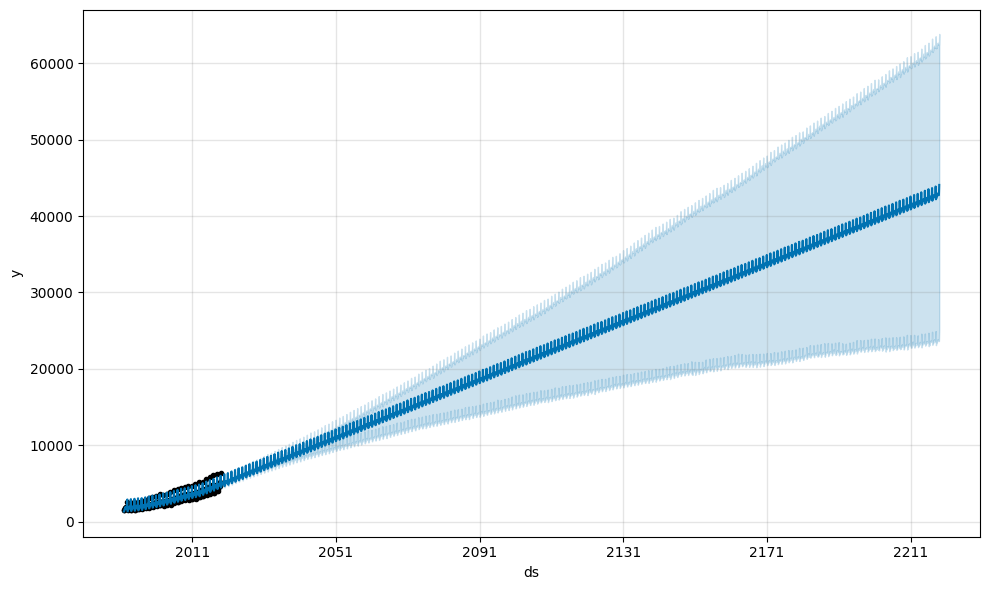

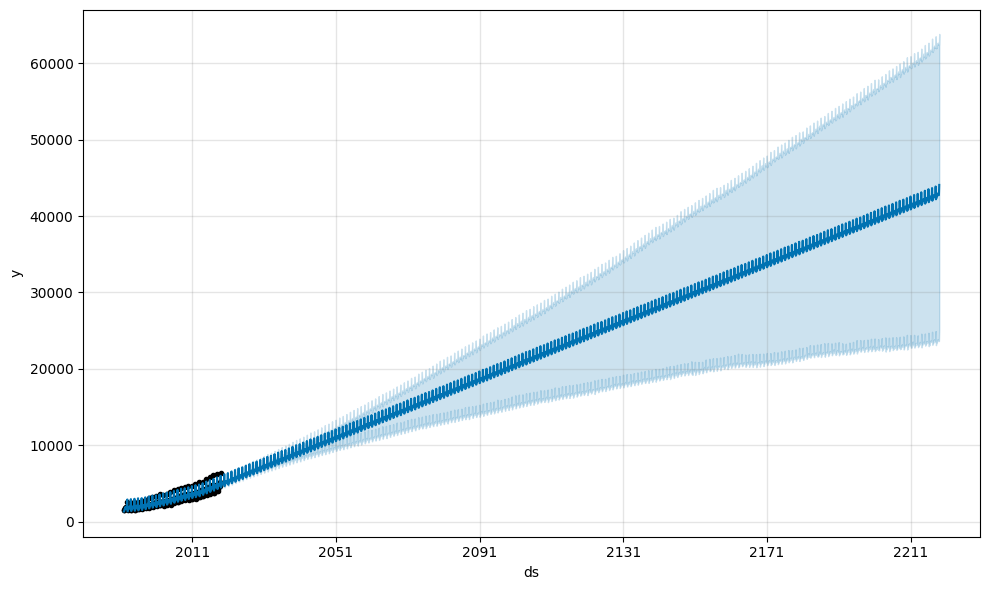

In [ ]:
# now visulisting that forcasted data in the graph
# shoing 1=maxmima valus , minima values and valus acoding to trend
m.plot(forcast)

<Axes: xlabel='ds'>

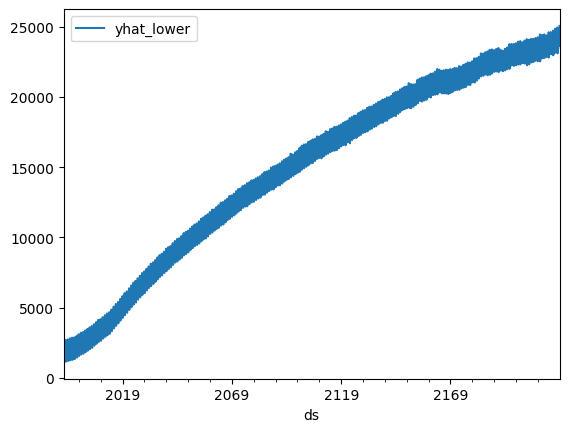

In [ ]:
forcast.plot(x='ds',y='yhat_lower')

<Axes: xlabel='ds'>

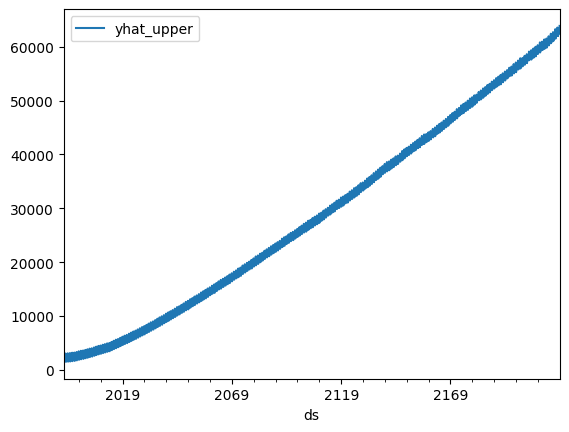

In [ ]:
forcast.plot(x='ds',y='yhat_upper')

<Axes: xlabel='ds'>

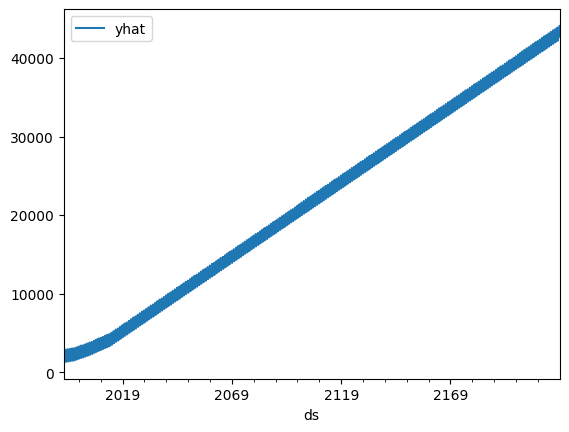

In [ ]:
forcast.plot(x='ds',y='yhat')